<a href="https://colab.research.google.com/github/AdrienHdz/Deep_Learning_HEC/blob/master/Pytorch_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II: Deep Learning and Applications
# Homework 1

**Due date: Feb 16**


Install PyTorch and Skorch.

In [ ]:
!pip install -q torch skorch torchvision torchtext

     |████████████████████████████████| 112kB 4.8MB/s 


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Tensor Operations (20 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], 
                  [3, 4], 
                  [5, 6]])
x.shape
# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.unsqueeze(torch.unsqueeze(x,1),-1)
print(x.shape)
# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.squeeze(torch.squeeze(x,-1),1)
print(x.shape)
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = torch.Tensor.view(x,6)
print(x.shape)


torch.Size([3, 1, 2, 1])
torch.Size([3, 2])
torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.

# Use torch.stack to generate such a z
z = torch.stack((x,y),0)
print(z[0,:,:])
# Use torch.cat and torch.unsqueeze to generate such a z
z = torch.cat((torch.unsqueeze(x,0),torch.unsqueeze(y,0)))
print(z[1,:,:])

tensor([[-1., -2.],
        [-3., -4.],
        [-5., -6.]])

### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice. 

In [ ]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = torch.unsqueeze(x,0)
print(x.shape)

# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z = x.expand(2,-1)
print(z.shape)

torch.Size([1, 3])
torch.Size([2, 3])
tensor([1., 2., 3.])


### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [ ]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
x_mean = torch.mean(x,1)
print(x_mean[3, ])

# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = torch.sum(x,1)
print(x_sum.shape)

# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max = torch.max(x,1)[0]
print(x_max.shape)

# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min = torch.min(x,1)[0]
print(x_min.shape)

# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_mean_xtop = x.topk(5,1).values
print((x_mean_xtop.shape))


torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10, 5])


## Convolutional Neural Networks (40 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.

In [ ]:
train = torchvision.datasets.CIFAR10("./data", train=True, download=True)
test = torchvision.datasets.CIFAR10("./data", train=False, download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

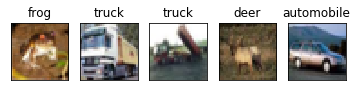

In [ ]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train.labels = [train.classes[target] for target in train.targets]
plot(train.data, train.labels)

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers

Implement the initialization function and the forward function of the CNN.

In [ ]:
class CNN(nn.Module):
  def __init__(self, channels):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3,channels,3,padding=1)
    self.conv2 = nn.Conv2d(channels,channels,3,padding=1)
    self.conv3 = nn.Conv2d(channels,channels,3,padding=1)
    self.fc1 = nn.Linear(channels*32*32,10)
  
  def forward(self, images):
    images = images.float()
    images = F.relu(self.conv1(images))
    images = F.relu(self.conv2(images))
    images = F.relu(self.conv3(images))
    images = images.view(images.size(0), -1)
    images = self.fc1(images)
    return images

#### b) Tune hyperparameters

Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

In [ ]:
# implement hyperparameters here

learning_rate = [1e-5, 1e-4, 1e-3, 1e-2]
optimize = [torch.optim.SGD, torch.optim.Adam]
channel = [128, 256, 512]


train_data_normalized = torch.Tensor(train.data/255)
train_data_normalized = train_data_normalized.permute(0,3,1,2)

for l in learning_rate:
  for o in optimize: 
    for c in channel:
      print(f'The channel was {c}, the learning rate was {l} and the optimizer was {str(o)}')

      cnn = CNN(channels = c)
      
      model = skorch.NeuralNetClassifier(cnn, criterion=torch.nn.CrossEntropyLoss,
                                   device="cuda",
                                   optimizer=o,
                                  # optimizer__momentum=0.90,
                                   lr=l,
                                   max_epochs=25,
                                   batch_size=64,
                                   callbacks=[skorch.callbacks.EarlyStopping(lower_is_better=True)])
      # implement input normalization & type cast here 
      model.fit(train_data_normalized, np.asarray(train.targets))

The channel was 128, the learning rate was 1e-05 and the optimizer was <class 'torch.optim.sgd.SGD'>
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        2.3032       0.0999        2.3027  18.5060
      2        2.3021       0.0990        2.3016  18.4268
      3        2.3010       0.1131        2.3005  18.4448
      4        2.3000       0.1135        2.2995  18.4798
      5        2.2990       0.1079        2.2985  18.4404
      6        2.2981       0.1052        2.2975  18.4569
      7        2.2971       0.1037        2.2965  18.4508
      8        2.2961       0.1036        2.2956  18.4712
      9        2.2952       0.1029        2.2946  18.4494
     10        2.2942       0.1029        2.2936  18.4175
     11        2.2933       0.1035        2.2926  18.4708
     12        2.2923       0.1039        2.2916  18.4207
     13        2.2913       0.1053        2.2906  18.4349
     14        2.2903       0

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     | 64.13 | 65.91 |
| (256, 256, 256)                     | 63.35 | 64.89 |
| (512, 512, 512)                     | 63.93 | 66.12 |


### 2) Full CNN implementation

Based on the CNN in the previous question, implement a full CNN model with max pooling layer.

- Add a max pooling layer after each convolutional layer.
- Each max pooling layer has a kernel size of 2 and a stride of 2.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table. You are also required to complete the questions.

#### a) Implement max pooling layers

Copy the CNN implementation in previous question. Implement max pooling layers.

In [ ]:
class CNN_MaxPool(nn.Module):
  def __init__(self):
    super(CNN_MaxPool, self).__init__()
    self.conv1 = nn.Conv2d(3,512,3,padding=1)
    self.conv2 = nn.Conv2d(512,512,3,padding=1)
    self.conv3 = nn.Conv2d(512,512,3,padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(512*4*4,10)
    
    # implement parameter definitions here
  
  def forward(self, images):
    #images = images.float()
    images = self.pool(F.relu(self.conv1(images)))
    images = self.pool(F.relu(self.conv2(images)))
    images = self.pool(F.relu(self.conv3(images)))
    #print(images.shape)
    images = images.view(images.size(0), -1)
    images = self.fc1(images)
    # implement the forward function here
    return images

#### b) Tune hyperparameters

Based on best optimizer you found in the previous problem, tune the number of channels and learning rate for best validation accuracy.

In [ ]:
model = skorch.NeuralNetClassifier(CNN_MaxPool, criterion=torch.nn.CrossEntropyLoss,
                                   device="cuda",
                                   optimizer=torch.optim.Adam,
                                   lr=0.0001,
                                   max_epochs=100,
                                   batch_size=64,
                                  callbacks=[skorch.callbacks.EarlyStopping(lower_is_better=True)],)

# implement input normalization & type cast here
train_data_normalized = torch.Tensor(train.data/255) 
train_data_normalized = train_data_normalized.permute(0,3,1,2)

model.fit(train_data_normalized, np.asarray(train.targets))


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.6548       0.5282        1.3343  16.7617
      2        1.2446       0.6112        1.1179  16.7871
      3        1.0674       0.6559        0.9982  16.7890
      4        0.9457       0.6755        0.9350  16.7998
      5        0.8547       0.6916        0.8925  16.7792
      6        0.7818       0.7005        0.8618  16.7560
      7        0.7190       0.7089        0.8419  16.8500
      8        0.6625       0.7167        0.8247  16.8303
      9        0.6106       0.7237        0.8100  16.8161
     10        0.5605       0.7308        0.7962  16.8390
     11        0.5138       0.7336        0.7851  16.8361
     12        0.4679       0.7400        0.7769  16.8542
     13        0.4230       0.7416        0.7835  16.7921
     14        0.3821       0.7402        0.7988  16.8363
     15        0.3428       0.7375        0.8234  16.8182
     16       

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN_MaxPool(
    (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=8192, out_features=10, bias=True)
  ),
)

Write down the **validation accuracy** of your model under different hyperparameter settings.

| #channel for each layer | validation accuracy |
|-------------------------|---------------------|
| (128, 128, 128)         |         72.62       |
| (128, 256, 512)         |          74.77      |
| (256, 256, 256)         |          73.88      |
| (256, 512, 1024)        |          74.13       |
| (512, 512, 512)         |          74.76        |
| (512, 1024, 2048)       |          74.70      |


For the best model you have, test it on the test set.

It is fine if you found some hyperparameter combination better than those listed in the tables.

In [ ]:
# implement the same input normalization & type cast here
test_data_normalized = torch.Tensor(test.data/255) 
test_data_normalized = test_data_normalized.permute(0,3,1,2)
test.predictions = model.predict(test_data_normalized)
sklearn.metrics.accuracy_score(test.targets, test.predictions)

0.7081

How much **test accuracy** do you get?

**Your Answer:** I get 70.81% of test accuracy

What can you conclude for the design of CNN structure?

**Your Answer:** Regarding the first simple CNN structure, we get almost the same accuracy (around 64%) for the different hyperparameters settings. We can see that as mentionned above, the SGD optimizer required more epoches than Adam optimizer to converge. We can also see that the increase in the dimension of the channel for each layer was not beneficial in this case. Indeed, we got 65.91% validation accuracy for the channels (128,128,128) with a duration of 18 secondes per epoch, compared to 66.12% validation accuracy for the channels (512, 512, 512) with a duration of 84 secondes per epoch. Meaning much more training time for almost the same validation accuracy!

Regarding the second CNN model, we added 3 MaxPooling layers (one after each convolutionnal layer) that had 2 impressive benefits. The first one is that we increased our validation accuracy by 10%, going from 64% to 74.77% (in the best cases). The second one is that we decreased our training time significantly from 84 secondes to 16 secondes per epoch for the channels configuration (512, 512, 512). We can see that by down-sampling the input dimension and by reducing its dimensionality by keeping the max values, we were able to improve our model accuracy and decrease the training time! 
In this case, we can conclude that adding layers and pooling parameters we were able to improve the model accuracy.



## Recurrent Neural Networks (40 points)

Next, let's use PyTorch to implement a recurrent neural network for sentiment analysis, i.e., classifying sentences into given sentiment labels, including positive, negative and neutral.

We use a benckmark dataset (i.e., SST) for this task. First, let's download the SST dataset, and do some preprocessing to build vocabulary and split the dataset into training/validation/test sets. Also, let's define the training and evaluation function. Please do not modify the functions.

In [ ]:
import copy
import torch
from torch import nn
from torch import optim
import torchtext
from torchtext import data
from torchtext import datasets

TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.LabelField()

# load data splits
train_data, val_data, test_data = datasets.SST.splits(TEXT, LABEL)

# build dictionary
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

vocab_size = len(TEXT.vocab)
label_size = len(LABEL.vocab)
padding_idx = TEXT.vocab.stoi['<pad>']
embedding_dim = 128
hidden_dim = 256

# build iterators
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (train_data, val_data, test_data), 
    batch_size=32)

# train a model
# DO NOT MODIFY
def train(model, iterator, optimizer, criterion):
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        logits = model(batch.text.cuda())
        predictions = torch.max(logits, dim=-1)[1]
        loss = criterion(logits, batch.label.cuda())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
        total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

# evaluate a model
# DO NOT MODIFY
def evaluate(model, iterator, criterion):  
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            logits = model(batch.text.cuda())
            predictions = torch.max(logits, dim=-1)[1]
            loss = criterion(logits, batch.label.cuda())

            total_loss += loss.item()
            total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
            total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

Next, we are ready to build our RNN model for sentiment analysis. In the following codes, we have provided several hyperparameters we needed for building the model, including vocabulary size (vocab_size), the word embedding dimension (embedding_dim), the hidden layer dimension (hidden_dim), the number of layers (num_layers) and the number of sentence labels (label_size). Please fill in the missing codes, and implement an LSTM model.

In [ ]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, label_size, padding_idx):
        super(RNNClassifier, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.label_size = label_size
        self.num_layers = 1

        # add the layers required for sentiment analysis.
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=self.num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim,label_size)
         

    def zero_state(self, batch_size): 
        # implement the function, which returns an initial hidden state.
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).cuda() # hidden state
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).cuda() # cell state
        return h0, c0

    def forward(self, text):
        # implement the forward function of the model.
        h0, c0 = self.zero_state(text.size(0))
        embedding = self.embedding(text)
        output , (h0, c0) = self.lstm(embedding, (h0, c0))
        output = self.fc(output)
        output = F.log_softmax(output[:, -1, :], dim=1)
        return output

Finally, we are ready to train the model and compute the accuracy.

In [ ]:
model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
# tune the optimizer type and hyperparameters here
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
model.cuda()
criterion.cuda()

# train and test the model
# DO NOT MODIFY
best_valid_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
for epoch in range(20):
    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, val_iter, criterion)

    print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f} | Train acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc, train_acc))

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_state_dict = copy.deepcopy(model.state_dict())

Epoch 0 | Train loss 1.052 | Valid loss 1.043 | Valid acc 0.405 | Train acc 0.412
Epoch 1 | Train loss 1.047 | Valid loss 1.058 | Valid acc 0.403 | Train acc 0.423
Epoch 2 | Train loss 1.043 | Valid loss 1.097 | Valid acc 0.371 | Train acc 0.422
Epoch 3 | Train loss 1.034 | Valid loss 1.163 | Valid acc 0.446 | Train acc 0.430
Epoch 4 | Train loss 0.987 | Valid loss 1.109 | Valid acc 0.494 | Train acc 0.521
Epoch 5 | Train loss 0.857 | Valid loss 1.125 | Valid acc 0.540 | Train acc 0.626
Epoch 6 | Train loss 0.713 | Valid loss 1.187 | Valid acc 0.532 | Train acc 0.703
Epoch 7 | Train loss 0.564 | Valid loss 1.238 | Valid acc 0.540 | Train acc 0.768
Epoch 8 | Train loss 0.455 | Valid loss 1.306 | Valid acc 0.543 | Train acc 0.818
Epoch 9 | Train loss 0.364 | Valid loss 1.359 | Valid acc 0.542 | Train acc 0.859
Epoch 10 | Train loss 0.281 | Valid loss 1.450 | Valid acc 0.524 | Train acc 0.900
Epoch 11 | Train loss 0.216 | Valid loss 1.520 | Valid acc 0.550 | Train acc 0.930
Epoch 12 | Tra

Once we find the best hyperparameters for the validation set, we can now evaluate our model on the test set.

In [ ]:
model.load_state_dict(best_state_dict)
test_loss, test_acc = evaluate(model, test_iter, criterion)
print('Test loss {:.3f} | Test acc {:.3f}'.format(test_loss, test_acc))

Test loss 1.518 | Test acc 0.608


### 1) Implement the RNN model

The current codes of the RNN model are not complete, so let's first complete the codes to implement a standard RNN model by filling in the [block](https://colab.research.google.com/drive/1mhhF9FPHSmePtVQrhNBwRujfUkOjUspj#scrollTo=kWUKPgDGNQSr).

- **Subtask 1-1: Creating all the Required Layers in Your Model**

Remember that when building a deep learning model, we first need to complete the **init** function by creating all the required layers. In our case, since we are using RNNs for sentence classification, we need an embedding layer to transform words into word embeddings, a RNN layer to transform word embeddings into sentence encodings, an activation function, and a linear layer as well as a softmax function for sentence classification.

Based on that, please create all the necessary layers of your RNN model in the **init** function. Note that we have already added the word embedding layer for you.

- **Subtask 1-2: Implementing the Function for Initializing Hidden States**

Remember that when applying a RNN unit to transform word embeddings into sentence encodings, the RNN unit starts from an initial hidden vector with all zero values, and sequentially read each word to update the hidden vector. Finally, the hidden vector obtained after reading the last word is treated as the sentence encoding.

In this step, please implement the **zero_state** function, which returns a batch of initial hidden vectors given a batch size. Hint: your function should return a tensor with all the values being zero, and you may refer to the [official document](https://pytorch.org/docs/stable/nn.html#rnn) for the correct shape of the tensor.

- **Subtask 1-3: Implementing the Forward Function**

Finally, we are ready to build the forward function, which takes a batch of sentences as inputs and returns the a batch of logits. To be more specific, the input is given by the tensor called $\text{text}$, and the size of the tensor is $(B, L)$, with $B$ being the batch size, $L$ being the maximum length of sentencees in this batch and $\text{text}[i, j]$ being the interger id of the $j$-th word in the $i$-th sentence. Given this tensor as input, your forward function should return a logit tensor of size $(B, C)$, with $B$ being the batch size and $C$ being the number of possible classes.

Please implement the forward function based on the above instructions. Note that we have already applied the word embedding layer to the text input, and obtained a tensor called $\text{embedding}$, and the size of the tensor is $(B, L, D)$, where $D$ is the word embedding dimension. You can directly operate on the $\text{embedding}$ tensor to compute the logits.

### 2) Compare Different Optimizers

In the previous task, we have implemented a RNN model for sentiment analysis, or more generally sentence classification.

To better understand several concepts in deep learning, let's do some ablation studies by using the model we have just implemented.

The first task is to try different optimizers for your model, where for each optimizer, you may also try different options of learning rate. 


- **Subtask 2-1: Completing the Table**

We have provided the following table for different combinations of optimizers and learning rate, please write down the **validation accuracy** of your model with different optimizers and learning rates.

|         | 0.1  | 0.01 | 0.001|0.0001|
|---------|------|------|------|------|
| SGD     |  40.8|   40.8   |   40.0   |   42.5   |
| Adam    |   53.2   |     50.7 |     55.3 |   48.4   |
| RMSprop |    48.0  |    49.4  |   53.3   |   50.2   |

- **Subtask 2-2: Explaining your Observations**

Based on your results, briefly explain your observations, e.g., which optimizer works the best, what is the optimal learning rate for each optimizer?

*Your Answer:* According to the results we can see that the optimizer that work the best is Adam. It's optimal learning rate was 0.001 to get a validation accuracy of 55.3%. This learning rate of 0.001 was also the best for RMSprop has it got its highest accuracy score of 53.3%. For both Adam and RMSprop, the validation accuracy was fluctuating a lot, going from 53.2% to ~25% to ~50%, etc, when the learning rate was high (e.g 0.1). It seems that theses optimizers were not able to find a local optima when the learning rate was too high.

Regarding SGD, for this optimizer the validation accuracy was not fluctuating when the learning rate was too high, but stayed stuck at around 40% validation accuracy for a learning rate of 0.1. For the lower learning rates, the model was learning too slowly and would have require more than 20 epoches to maybe get a score as good as Adam.


### 3) Compare the Results under Different Epoches

In this task, we hope to compare the results of our model under different training epoches, and answer a question.

- **Subtask 3-1: Completing the Table**

We have provided the following table, please write down the **training accuracy** and **validation accuracy** of your model under different epoches.

|                    |  10  |  20  |  30  |  40  |  50  |
|--------------------|------|------|------|------|------|
| Training Accuracy  |  79.4    |  94.7    |    97.4  |   98.9   |  99.7    |
| Validation Accuracy|  55.2      |  55.0      |  54.5     |  55.3      | 56.0      |


- **Subtask 3-2: Answering the Question**

Is it always better to train a model for more epoches? How can we decide when should we stop training?

*Your Answer:* No it is not always better to train a model for more epoches since we will start to overfit. In our case, the model was able to reach its maximum accuracy on the validation set pretty quickly: 56.9% at epoch 12. This means that we should have stopped the training process here, at this epoch, since there were no improvement after, from epoch 12 to 50. Morever, we can see that the training loss kept decreasing, showing that the model was starting to overfit the training dataset and therefore to generalize poorly, as we can see that the validation loss started to increase more and more. Indeed, when training loss << validation loss, this means that we are overfitting which was the case.

### 4) Compare Different Model Capacities/Configurations

In practice, we may also vary the capacity of our model to find the optimal choice. In this part, please try different configurations of your model, which have different model capacities. Based on your observation, please also answer a question.

- **Subtask 4-1: Completing the Table**

Please write down the **validation accuracy** of your model under different model capacities (i.e., specified by the word embedding dimension and the hidden layer dimension).

|Embedding dim / Hidden dim |  64  |  128  |  256 |
|---------------------------|------|-------|------|
| 64                        |  54.7    |   55.8    | 58.4     |
| 128                       |   57.4   |    56.0   |  55.7    |
| 256                       |    56.7  |     57.6  |  57.3    |

- **Subtask 4-2: Answering the Question**

Is it always better to increase model capacities in this case? Is it always better to increase model capacities in general? How to decide a proper model capacity in practice?

*Your Answer:* In our case, increasing the model capacity to 256 for the hidden dimension is beneficial when the Embedding dimension is 64 as we can see a 3.7% increase in the validation accuracy. However, when the Embedding dimension is bigger: 128 and 256, increasing the Hidden Dimension size doesn't seem to add any value as the validation accuracy is almost the same 57% ~ 55%. In our case, we can consider that the model is almost able to get the same validation accuracy for different model capacity. 

We cannot say that it is always better to increase model capacities in general. As the model capacity refers to the ability for the model to learn more features and complex patterns in the dataset, it really depends on our dataset and the task we want to achieve in order to know if we should decrease or increase the model capacity. This means that a model with a low capacity would tend to underfit and a model with a high capacity would tend to overfit the data.
In practice, we will try to maximize validation error performance while trying to minimize the model capacity. We will use cross validation to test the best hyperparameters on the test set and we will use some regularization techniques such as L1, L2 or dropout in order to limit the model capacity and avoid overfitting.
